In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

In [2]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define the path to the ZIP file in Google Drive
zip_path = 'https://drive.google.com/file/d/1YvdQ0lsa5aqWB9OaLETU4oAfSDJckp5y/view?usp=sharing'  # Replace with the actual path to your ZIP file

In [4]:
import zipfile
import os
import gdown

# Step 1: Download the file from Google Drive
# Replace the part after 'id=' in the URL with the actual file ID.
file_id = '1_5G3Cz0WQtZeTxzsq5lrTUfEnNy78WeY'
zip_file_path = '/content/plant.zip'

# Downloading the file using gdown
gdown.download(f'https://drive.google.com/uc?export=download&id={file_id}', zip_file_path, quiet=False)

# Step 2: Extract the zip file
extract_dir = '/content/plant'

# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Verify extracted files
os.listdir(extract_dir)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1_5G3Cz0WQtZeTxzsq5lrTUfEnNy78WeY
From (redirected): https://drive.google.com/uc?export=download&id=1_5G3Cz0WQtZeTxzsq5lrTUfEnNy78WeY&confirm=t&uuid=1faa8979-08e2-44fe-af44-d0c97d45d3d2
To: /content/plant.zip
100%|██████████| 1.49G/1.49G [00:15<00:00, 94.2MB/s]


['Plant_Disease_Dataset', '__MACOSX']

In [5]:
# Load validation set to retrieve class names
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(299, 299),  # Adjusted to match InceptionV3 input size
    shuffle=True
)
class_name = validation_set.class_names
print("Class Names:", class_name)

Found 17572 files belonging to 38 classes.
Class Names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Sp

In [6]:
# Load the trained InceptionV3 model
cnn = tf.keras.models.load_model('/content/trained_plant_disease_inception_model.keras')

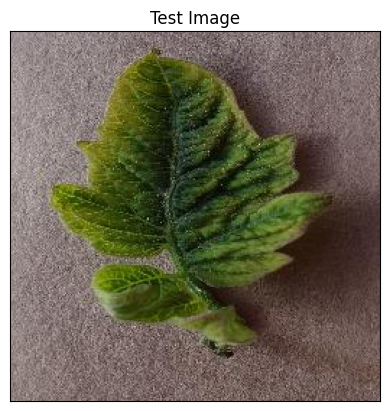

In [8]:
import os
import cv2
import matplotlib.pyplot as plt

# Test Image Path
image_path = '/content/test/test/TomatoYellowCurlVirus1.JPG'

# Check if the file exists
if not os.path.exists(image_path):
    print(f"Error: The file at path '{image_path}' does not exist.")
else:
    # Load and process the image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to load image from path '{image_path}'.")
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.imshow(img)
        plt.title('Test Image')
        plt.xticks([])
        plt.yticks([])
        plt.show()


In [9]:
# Preprocess the image for InceptionV3
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(299, 299))  # Resize to InceptionV3 input size
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = tf.keras.applications.inception_v3.preprocess_input(input_arr)  # Apply InceptionV3 preprocessing
input_arr = np.expand_dims(input_arr, axis=0)  # Convert single image to a batch

In [10]:
# Predict using the trained model
predictions = cnn.predict(input_arr)
print("Predictions:", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
Predictions: [[0.04985312 0.0355947  0.01271014 0.04305315 0.0173282  0.01961711
  0.00853966 0.05035225 0.01575387 0.03737235 0.02189333 0.00978778
  0.01184448 0.0182945  0.00586797 0.00810983 0.03769124 0.03319939
  0.03721554 0.02761832 0.02387441 0.02138896 0.02627724 0.0193376
  0.00945052 0.01125627 0.01909765 0.02193153 0.01443525 0.04865145
  0.07476053 0.0313213  0.03192664 0.02696326 0.03953575 0.01905665
  0.01515091 0.0438872 ]]


In [11]:
result_index = np.argmax(predictions)  # Get the index of the maximum probability
print("Predicted Index:", result_index)

Predicted Index: 30


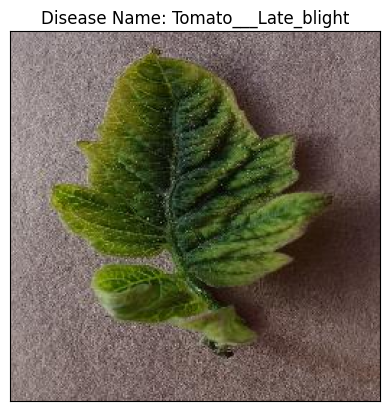

In [12]:
# Display the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()